In [11]:
#📊 Interpolation Türleri (OpenCV'de)
#Yöntem	Açıklama
#cv2.INTER_NEAREST	En yakın komşu → en hızlısı, ama kalitesiz (pikselli)
#cv2.INTER_LINEAR	2 komşu arasında lineer geçiş (küçültmede iyi)
#cv2.INTER_CUBIC	4x4 komşuyla kavisli geçiş → daha kaliteli, daha yavaş
#cv2.INTER_LANCZOS4	En pahalısı, ama en kaliteli (çok net detay verir)

In [1]:
import cv2 
import matplotlib.pyplot as plt 

In [2]:
image = cv2.imread("./giraffe.jpg")


In [3]:
image_rgb  = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

In [4]:
image_rgb.shape 

(730, 488, 3)

In [5]:
## imae resizing 
print(image_rgb.shape)

(730, 488, 3)


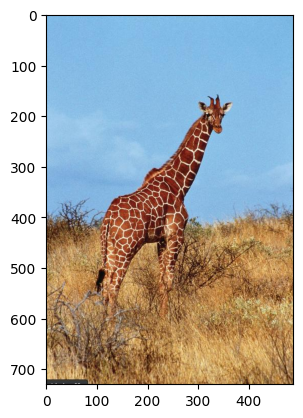

In [6]:
plt.imshow(image_rgb)

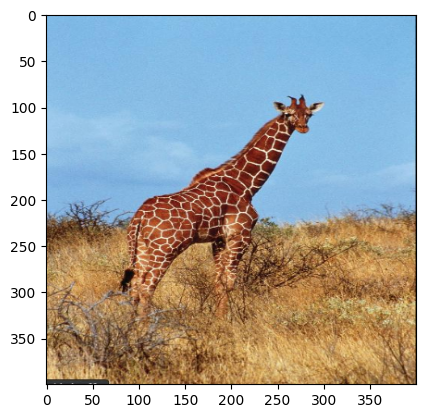

In [7]:
new_height  , new_width = 400 , 400 
resized_image = cv2.resize(image_rgb, (new_width,new_height))
plt.imshow(resized_image)

Text(0.5, 1.0, 'scaled image')

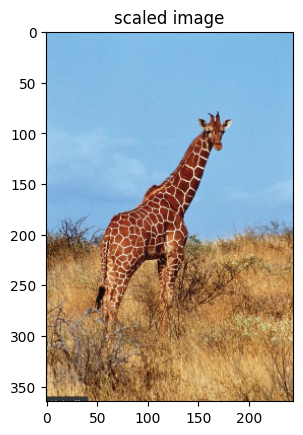

In [8]:
## image Scaling 

scale_percentage = 50
s_width =  int(image_rgb.shape[1] * scale_percentage / 100 )
s_height = int(image_rgb.shape[0] * scale_percentage /100)

scaled_image = cv2.resize(image_rgb , (s_width , s_height) , interpolation=cv2.INTER_AREA)

plt.imshow(scaled_image)
plt.title("scaled image")


In [9]:
scaled_image.shape

(365, 244, 3)

| Nerede?        | Sıralama                    |
| -------------- | --------------------------- |
| `image.shape`  | `(height, width, channels)` |
| `cv2.resize()` | `(width, height)`           |


In [32]:
resize_width = 600
resize_height = 600
## for better examinations 
resized_image1 = cv2.resize(image_rgb , (100,100))
#interpolation methods
methods = {

    'nearest': cv2.INTER_NEAREST , 
    'Linear': cv2.INTER_LINEAR,
    'Cubic': cv2.INTER_CUBIC,
    'area': cv2.INTER_AREA,
    'Lanczos4': cv2.INTER_LANCZOS4
}


resized_images = {}


for name , method in methods.items():
    resized =  cv2.resize(resized_image1 , (resize_width , resize_height) , interpolation=method)
    resized_images[name] = resized 
  



In [33]:
len(resized_images)

5

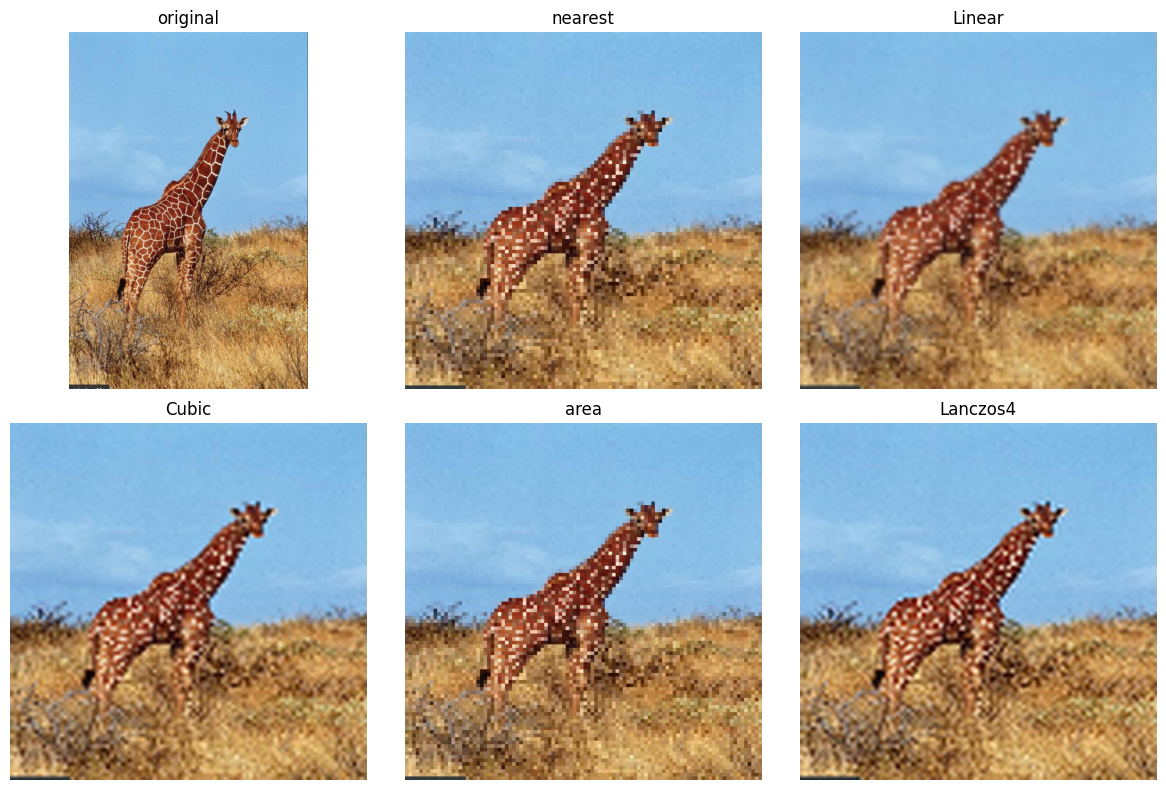

In [34]:
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.imshow(image_rgb) 
plt.title("original")
plt.axis("off")
for i , (key ,value ) in enumerate(resized_images.items() , start=2):
    cv2.imwrite(f"./{key}.jpg" , cv2.cvtColor(value , cv2.COLOR_BGR2RGB))
    plt.subplot(2,3,i)
    plt.imshow(value)
    plt.title(key)
    plt.axis("off")

plt.tight_layout()
plt.show()